#### Assignment 7
#### Rania Siddiqui 07494
#### rs07494@st.habib.edu.pk

In [25]:
import pandas as pd
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('Admission_chance_classification.csv')

In [57]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


### Classification using Admission_Chance_Classification.csv

In [60]:
X = df.drop(['Admit'],axis=1)
Y = df['Admit']

In [62]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,YES
1,324,107,4,4.0,4.5,8.87,YES
2,316,104,3,3.0,3.5,8.00,YES
3,322,110,3,3.5,2.5,8.67,YES
4,314,103,2,2.0,3.0,8.21,NO
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,YES
396,325,107,3,3.0,3.5,9.11,YES
397,330,116,4,5.0,4.5,9.45,YES
398,312,103,3,3.5,4.0,8.78,NO


In [64]:
X = pd.get_dummies(X, columns = ['Research'], dtype=int)

In [66]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,0,1
1,324,107,4,4.0,4.5,8.87,0,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,0,1
4,314,103,2,2.0,3.0,8.21,1,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0,1
396,325,107,3,3.0,3.5,9.11,0,1
397,330,116,4,5.0,4.5,9.45,0,1
398,312,103,3,3.5,4.0,8.78,1,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [73]:
X_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
376,297,96,2,2.5,2.0,7.43,1,0
171,334,117,5,4.0,4.5,9.07,0,1
115,310,106,4,4.5,4.5,9.04,0,1
24,336,119,5,4.0,3.5,9.80,0,1
43,332,117,4,4.5,4.0,9.10,1,0


In [92]:
#Creating a Decision Tree classifier
dtc = tree.DecisionTreeClassifier(random_state=99)

#Fitting the model to the training data
dtmodel = dtc.fit(X_train, y_train)


#Getting feature importances
feature_importances = dtc.feature_importances_
feature_importances

array([0.17943051, 0.04337157, 0.03513725, 0.09934641, 0.11405799,
       0.46277392, 0.        , 0.06588235])

In [94]:
predict_train_data = dtc.predict(X_train) #Predictting on the training data
predict_train_data

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
     

In [96]:
train_accuracy_data = accuracy_score(y_train, predict_train_data) * 100  #Calculating training accuracy
print(train_accuracy_data)

100.0


In [98]:
test_predict_data = dtc.predict(X_test)  # Predict on the test data
test_predict_data

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [100]:
test_accuracy_data = accuracy_score(y_test, test_predict_data) * 100  #Calculating test data accuracy
print(test_accuracy_data)

89.16666666666667


In [102]:
tree_representation = tree.export_text(dtc)  #Tree Representation
print(tree_representation)

|--- feature_5 <= 7.85
|   |--- feature_4 <= 2.75
|   |   |--- feature_0 <= 301.50
|   |   |   |--- class: NO
|   |   |--- feature_0 >  301.50
|   |   |   |--- feature_5 <= 7.57
|   |   |   |   |--- feature_0 <= 313.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_0 >  313.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- feature_5 >  7.57
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: NO
|   |--- feature_4 >  2.75
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: YES
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: NO
|--- feature_5 >  7.85
|   |--- feature_4 <= 1.75
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: NO
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: YES
|   |--- feature_4 >  1.75
|   |   |--- feature_5 <= 8.31
|   |   |   |--- feature_5 <= 8.29
|   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |--- feature_1 <= 10

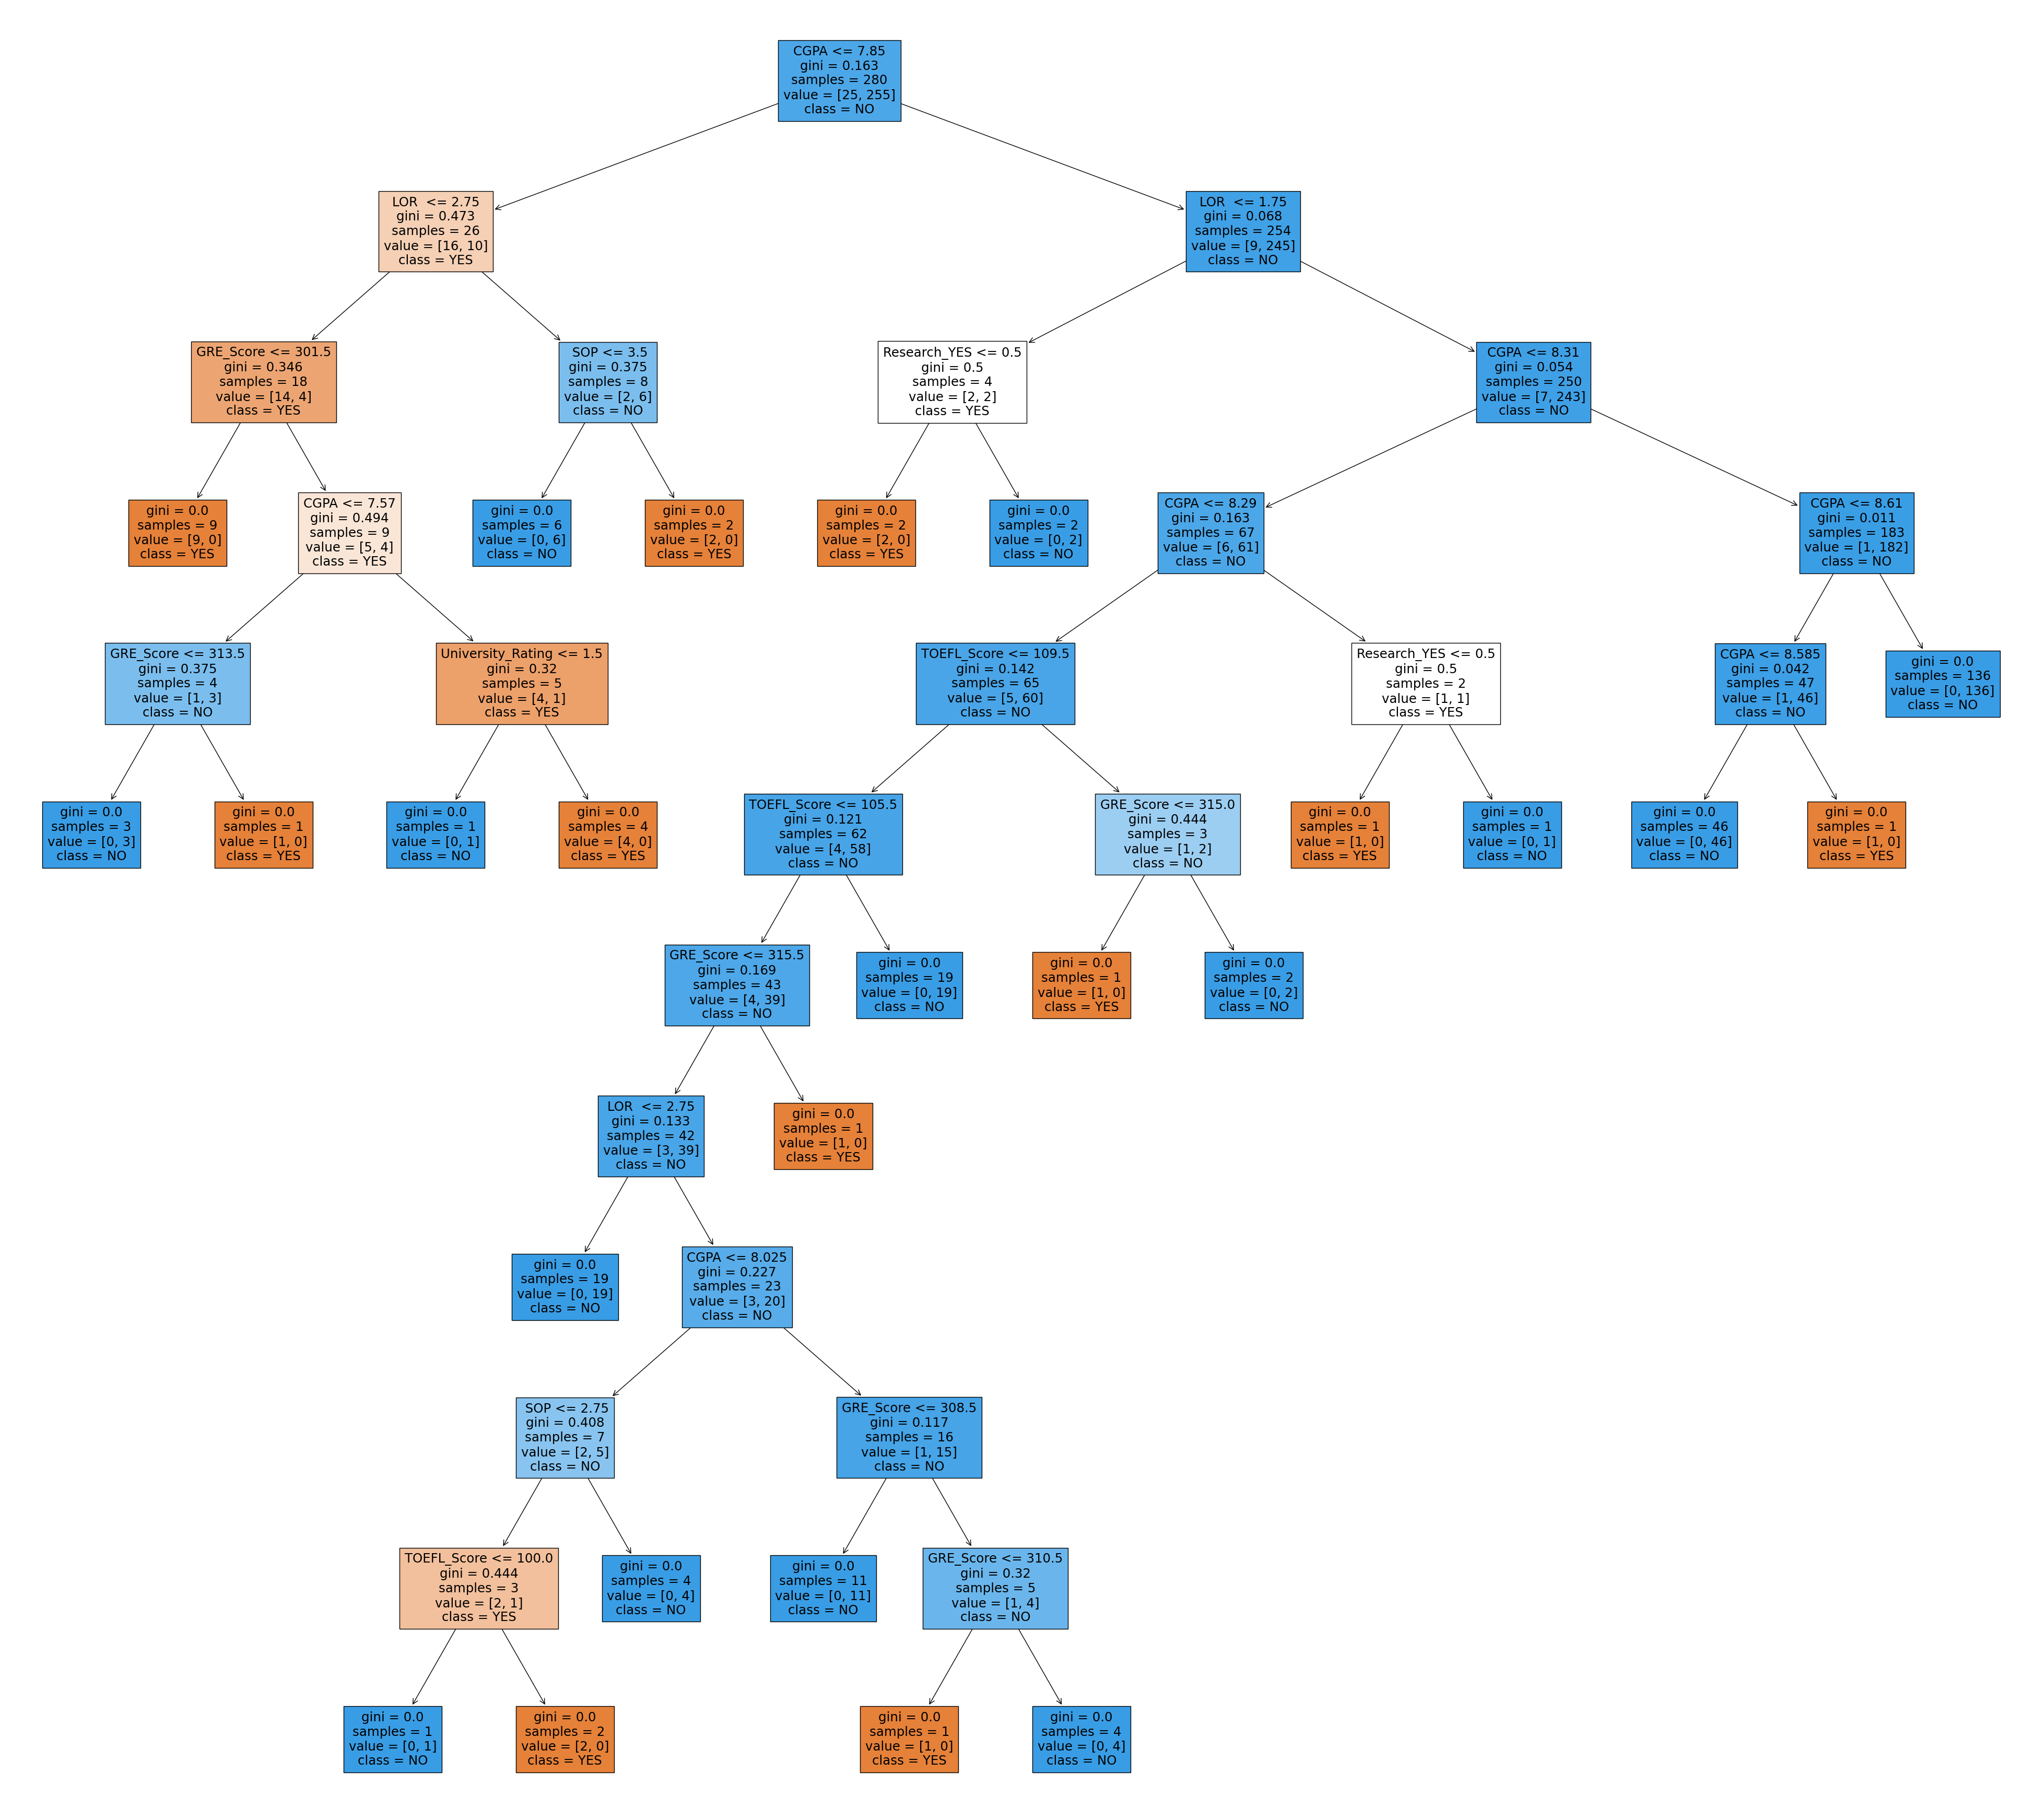

In [106]:
fig = plt.figure(figsize=(50, 45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=list(Y.value_counts().index),  # Convert to list
                   filled=True)

#### Explaination
#### The tree is very dense having depth of 11. This shows that the model is very complex having high variance. Which means that it is fitting very specific to training data hence getting 100% accuracy on the training data (overfitting). It is not that generalised as it performs relatively bad on unseen data. If a model doesn't perform well on test data, it means it's not generalised and we need to make it simpler. It is hard to interpret as well. In terms of features:

#### CGPA: Most important attribute (root of the tree). 

#### GRE Score: Highly significant, appears near the top of multiple branches. 

#### SOP and LOR: Important, used in several branches after CGPA and GRE.  

#### Research: Moderately important, used in some branches. 

#### University_Rating and TOEFL_Score: Probably not that important.

In [111]:
dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=99)

In [116]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [119]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.66666666666667

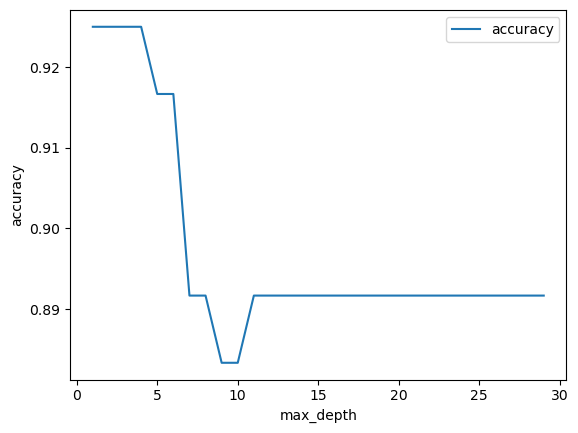

In [123]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [126]:
### Pruning the model

In [136]:
dt = tree.DecisionTreeClassifier(max_depth=4,random_state=99)

In [138]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

96.78571428571429

In [140]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

92.5

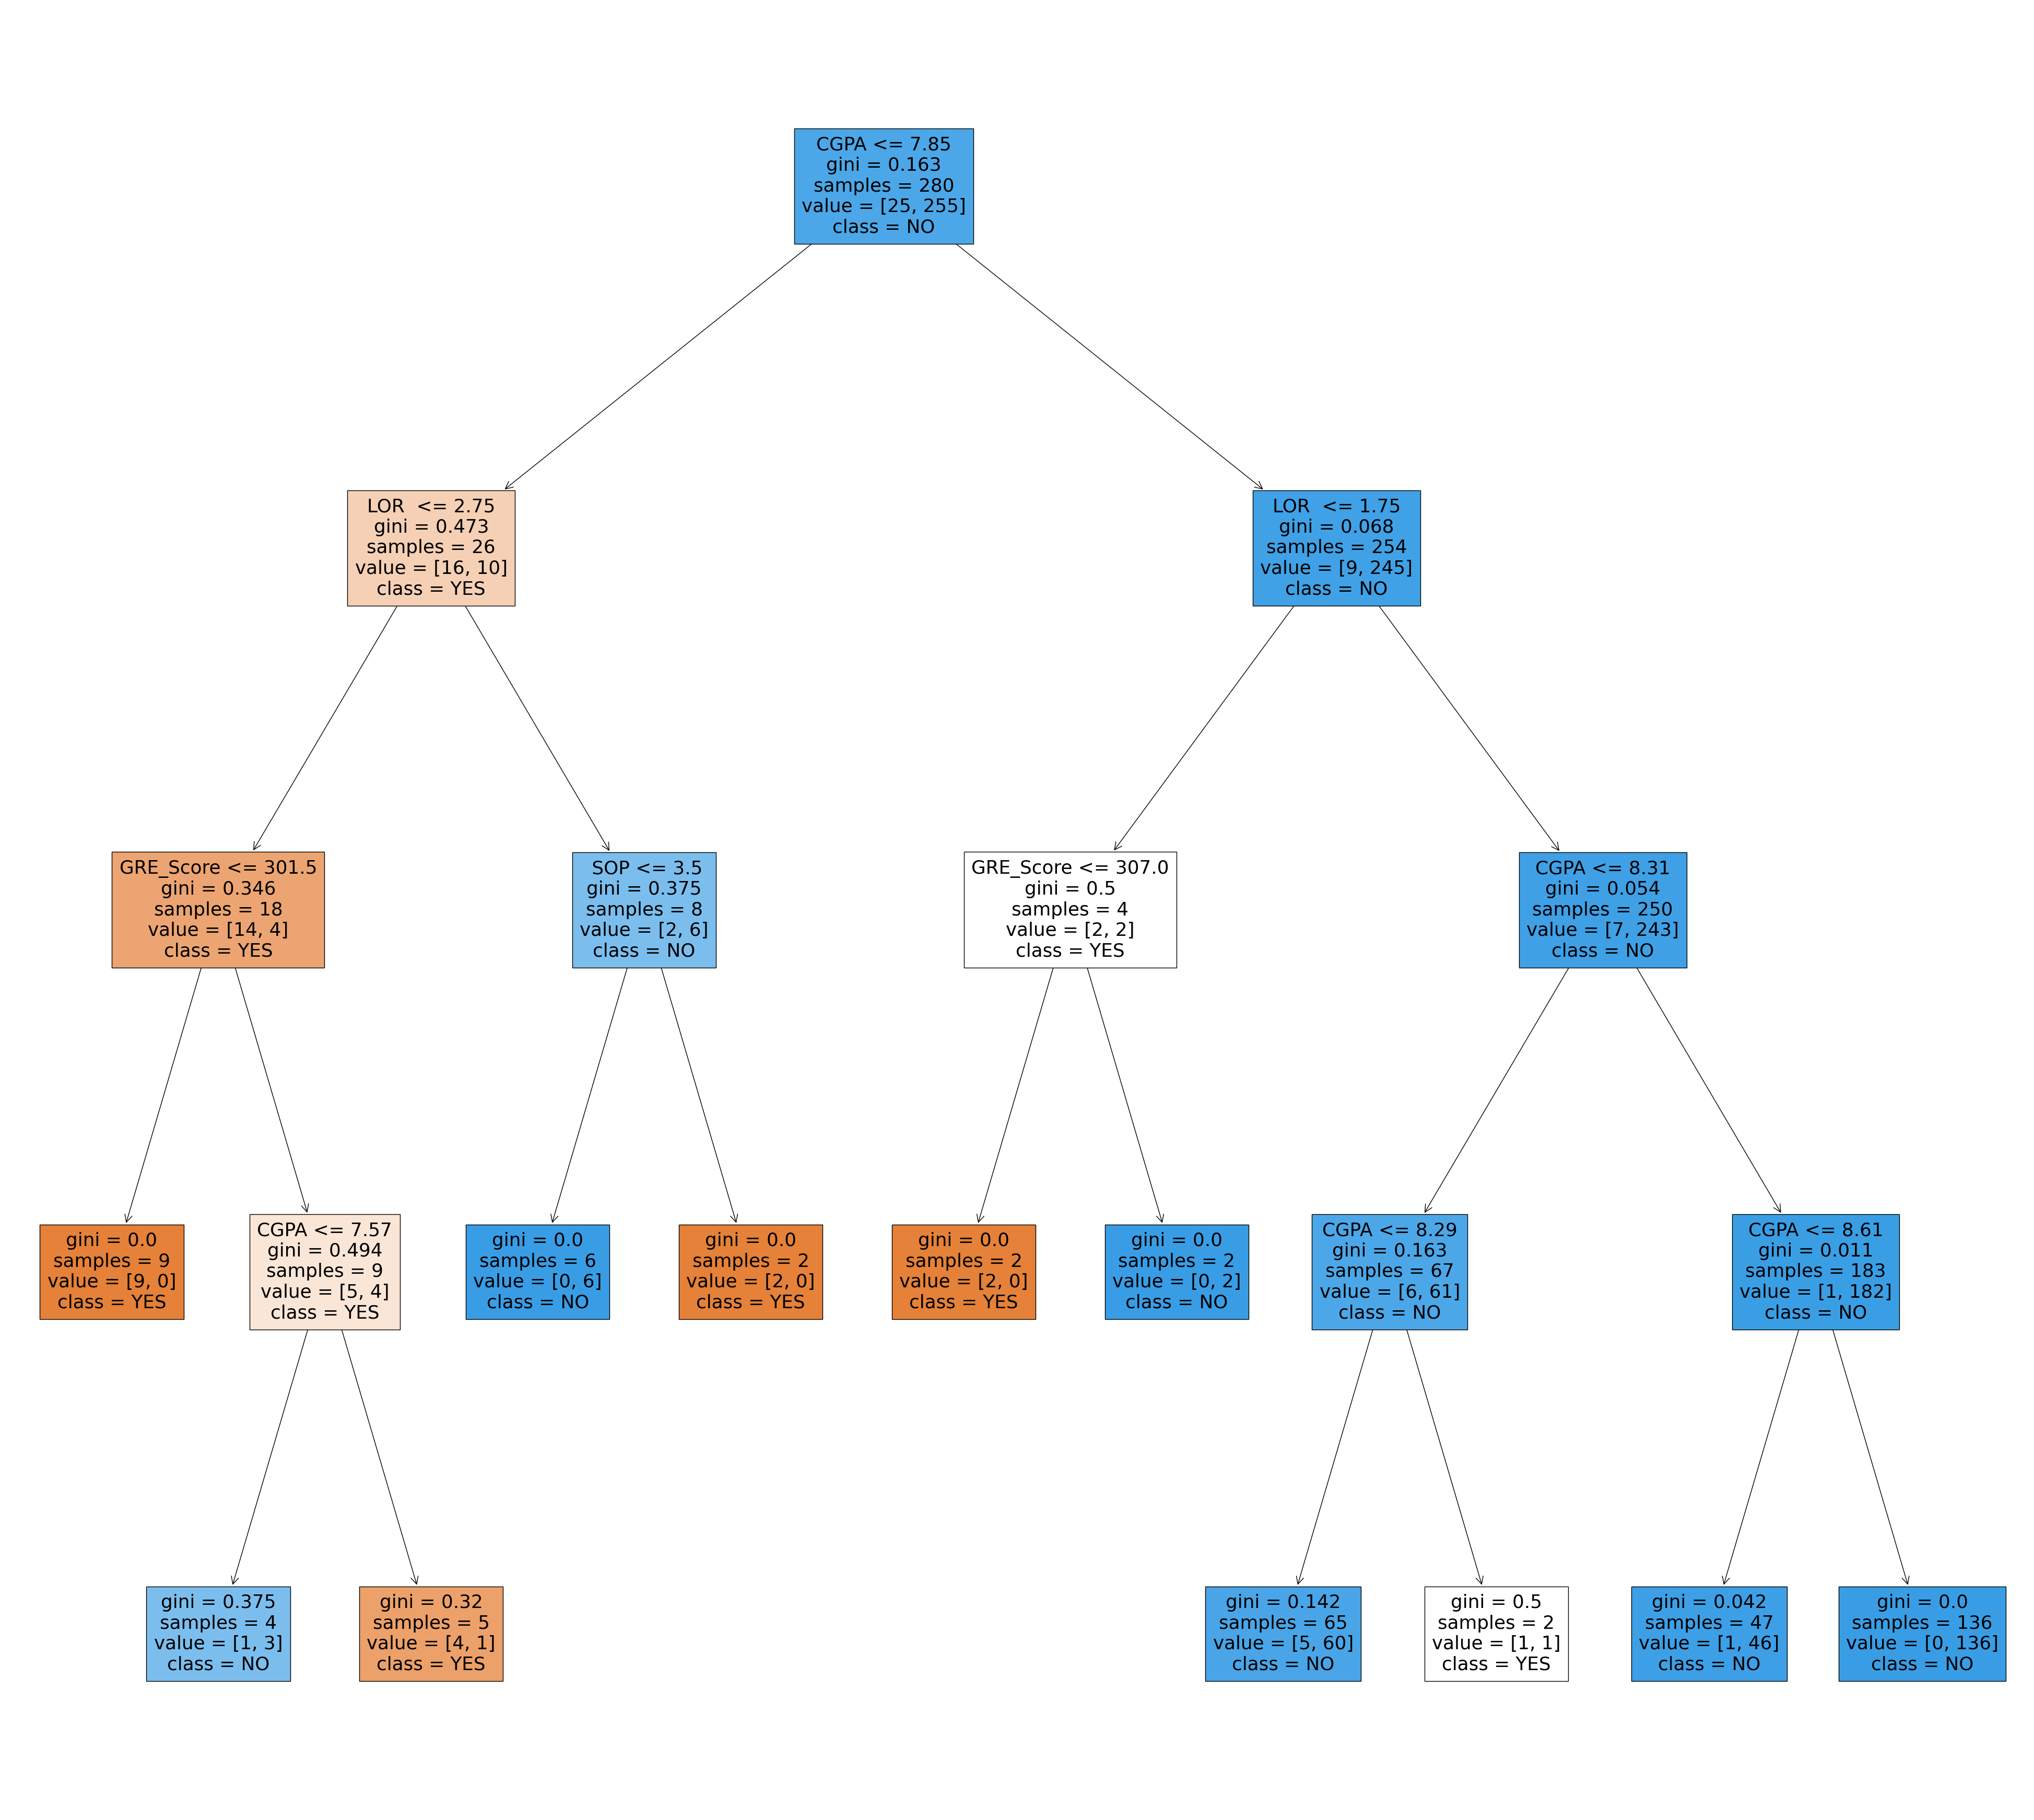

In [144]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

### Explaination

#### The original tree is much deeper and has more branches. Which shows a more complex model with finer decisions at each level, capturing more specific patterns in the training data. The pruned tree has fewer layers, reducing complexity by eliminating branches that provide minimal predictive power. So it is more generalizable and less prone to overfitting. The original model is likely overfitted to the training data that's why accuracy is 100% on training and around 86% for test data. The pruned version is simpler and should generalize better on unseen data, so accuracy is around 93.3%. The pruned tree is easier to interpret as well. It takes CGPA at the root and the most important feature. Then we take into account the LOR and SOP. GRE Scores also come up in a branch. This shows that the rest of the features might not be the most important ones to generalise the model

In [182]:
n_estimators_list = [10, 50, 100, 150, 200]

# Loop over each value of n_estimators
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n)
    rfmodel = rf.fit(X_train, y_train)

    # Predict on training set
    train_pred = rfmodel.predict(X_train)
    train_acc = accuracy_score(train_pred, y_train)
    print(f"Train accuracy for n_estimators={n}: {train_acc*100:.2f}%")

    # Predict on test set
    test_pred = rfmodel.predict(X_test)
    test_acc = accuracy_score(test_pred, y_test)
    print(f"Test accuracy for n_estimators={n}: {test_acc*100:.2f}%\n")

Train accuracy for n_estimators=10: 98.93%
Test accuracy for n_estimators=10: 93.33%

Train accuracy for n_estimators=50: 100.00%
Test accuracy for n_estimators=50: 94.17%

Train accuracy for n_estimators=100: 100.00%
Test accuracy for n_estimators=100: 94.17%

Train accuracy for n_estimators=150: 100.00%
Test accuracy for n_estimators=150: 95.00%

Train accuracy for n_estimators=200: 100.00%
Test accuracy for n_estimators=200: 95.00%



In [185]:
RandomForestClassifier(n_estimators=150)
rfmodel = rf.fit(X_train, y_train)

# Predict on training set
train_pred = rfmodel.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)
print(f"Train accuracy for n_estimators={n}: {train_acc*100:.2f}%")

# Predict on test set
test_pred = rfmodel.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)
print(f"Test accuracy for n_estimators={n}: {test_acc*100:.2f}%\n")

Train accuracy for n_estimators=200: 100.00%
Test accuracy for n_estimators=200: 95.83%



In [188]:
rfmodel.feature_importances_

array([0.17958977, 0.19038673, 0.05092421, 0.10193979, 0.12257538,
       0.32009056, 0.02007188, 0.01442168])

<BarContainer object of 8 artists>

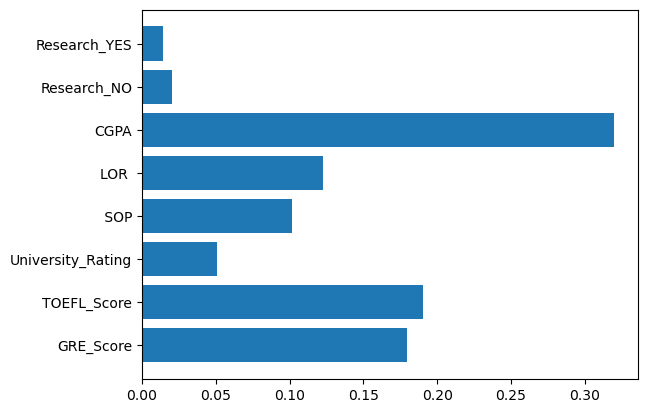

In [190]:
plt.barh(list(X.columns), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

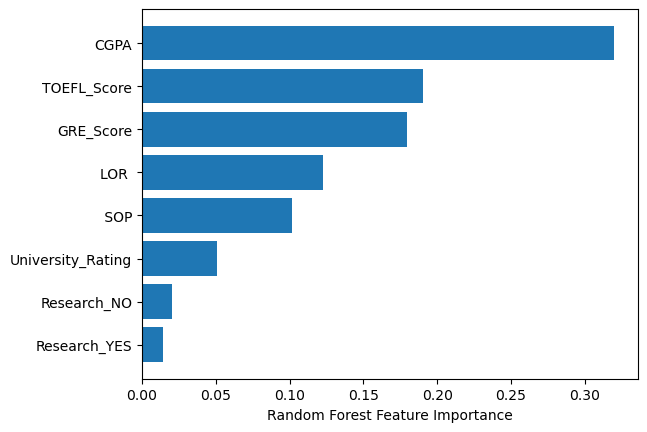

In [193]:
sorted_idx = rfmodel.feature_importances_.argsort()
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [198]:
scores = cross_val_score(rfmodel, X, Y, cv=5)
scores

array([0.9125, 0.925 , 0.9   , 0.975 , 0.9125])

In [199]:
scores.mean()

0.925

In [203]:
cm = confusion_matrix(y_train,train_pred)
cm

array([[ 25,   0],
       [  0, 255]], dtype=int64)

In [205]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[  5,   5],
       [  0, 110]], dtype=int64)

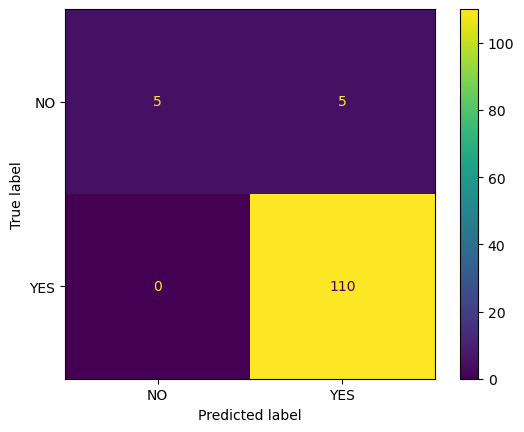

In [207]:
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

##### The best result using n_estimators = 150, producing a train accuracy of 100% along with test accuracy of 95.83%. It is around 6.67% better test accuracy than decision trees and 3.33% more than decison trees using decison tree pruned model. After conducting cross validation the accuracy of decision tree after pruning and random forest is almost similar which shows that cross validation is the best method for checking accuracy..

### Recommendation using burger-king-menu-2.csv

In [27]:
pd2 = pd.read_csv('burger-king-menu-2.csv')

In [29]:
pd2.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g)
0,Whopper® Sandwich,Burgers,660,360,40.0,12.0,1.5,90,980,49,2,11,28
1,Whopper® Sandwich with Cheese,Burgers,740,420,46.0,16.0,2.0,115,1340,50,2,11,32
2,Bacon & Cheese Whopper® Sandwich,Burgers,790,460,51.0,17.0,2.0,125,1560,50,2,11,35
3,Double Whopper® Sandwich,Burgers,900,520,58.0,20.0,3.0,175,1050,49,2,11,48
4,Double Whopper® Sandwich with Cheese,Burgers,980,580,64.0,24.0,3.0,195,1410,50,2,11,52


In [33]:
pd2 = pd2[pd2['Category'] == "Chicken"]

In [36]:
pd2 = pd2.drop('Category', axis=1)

In [39]:
X = pd2.drop('Item', axis=1)

Y = pd2['Item']

In [43]:
dt2 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=1,random_state=99)
dtmodel2 = dt2.fit(X, Y)

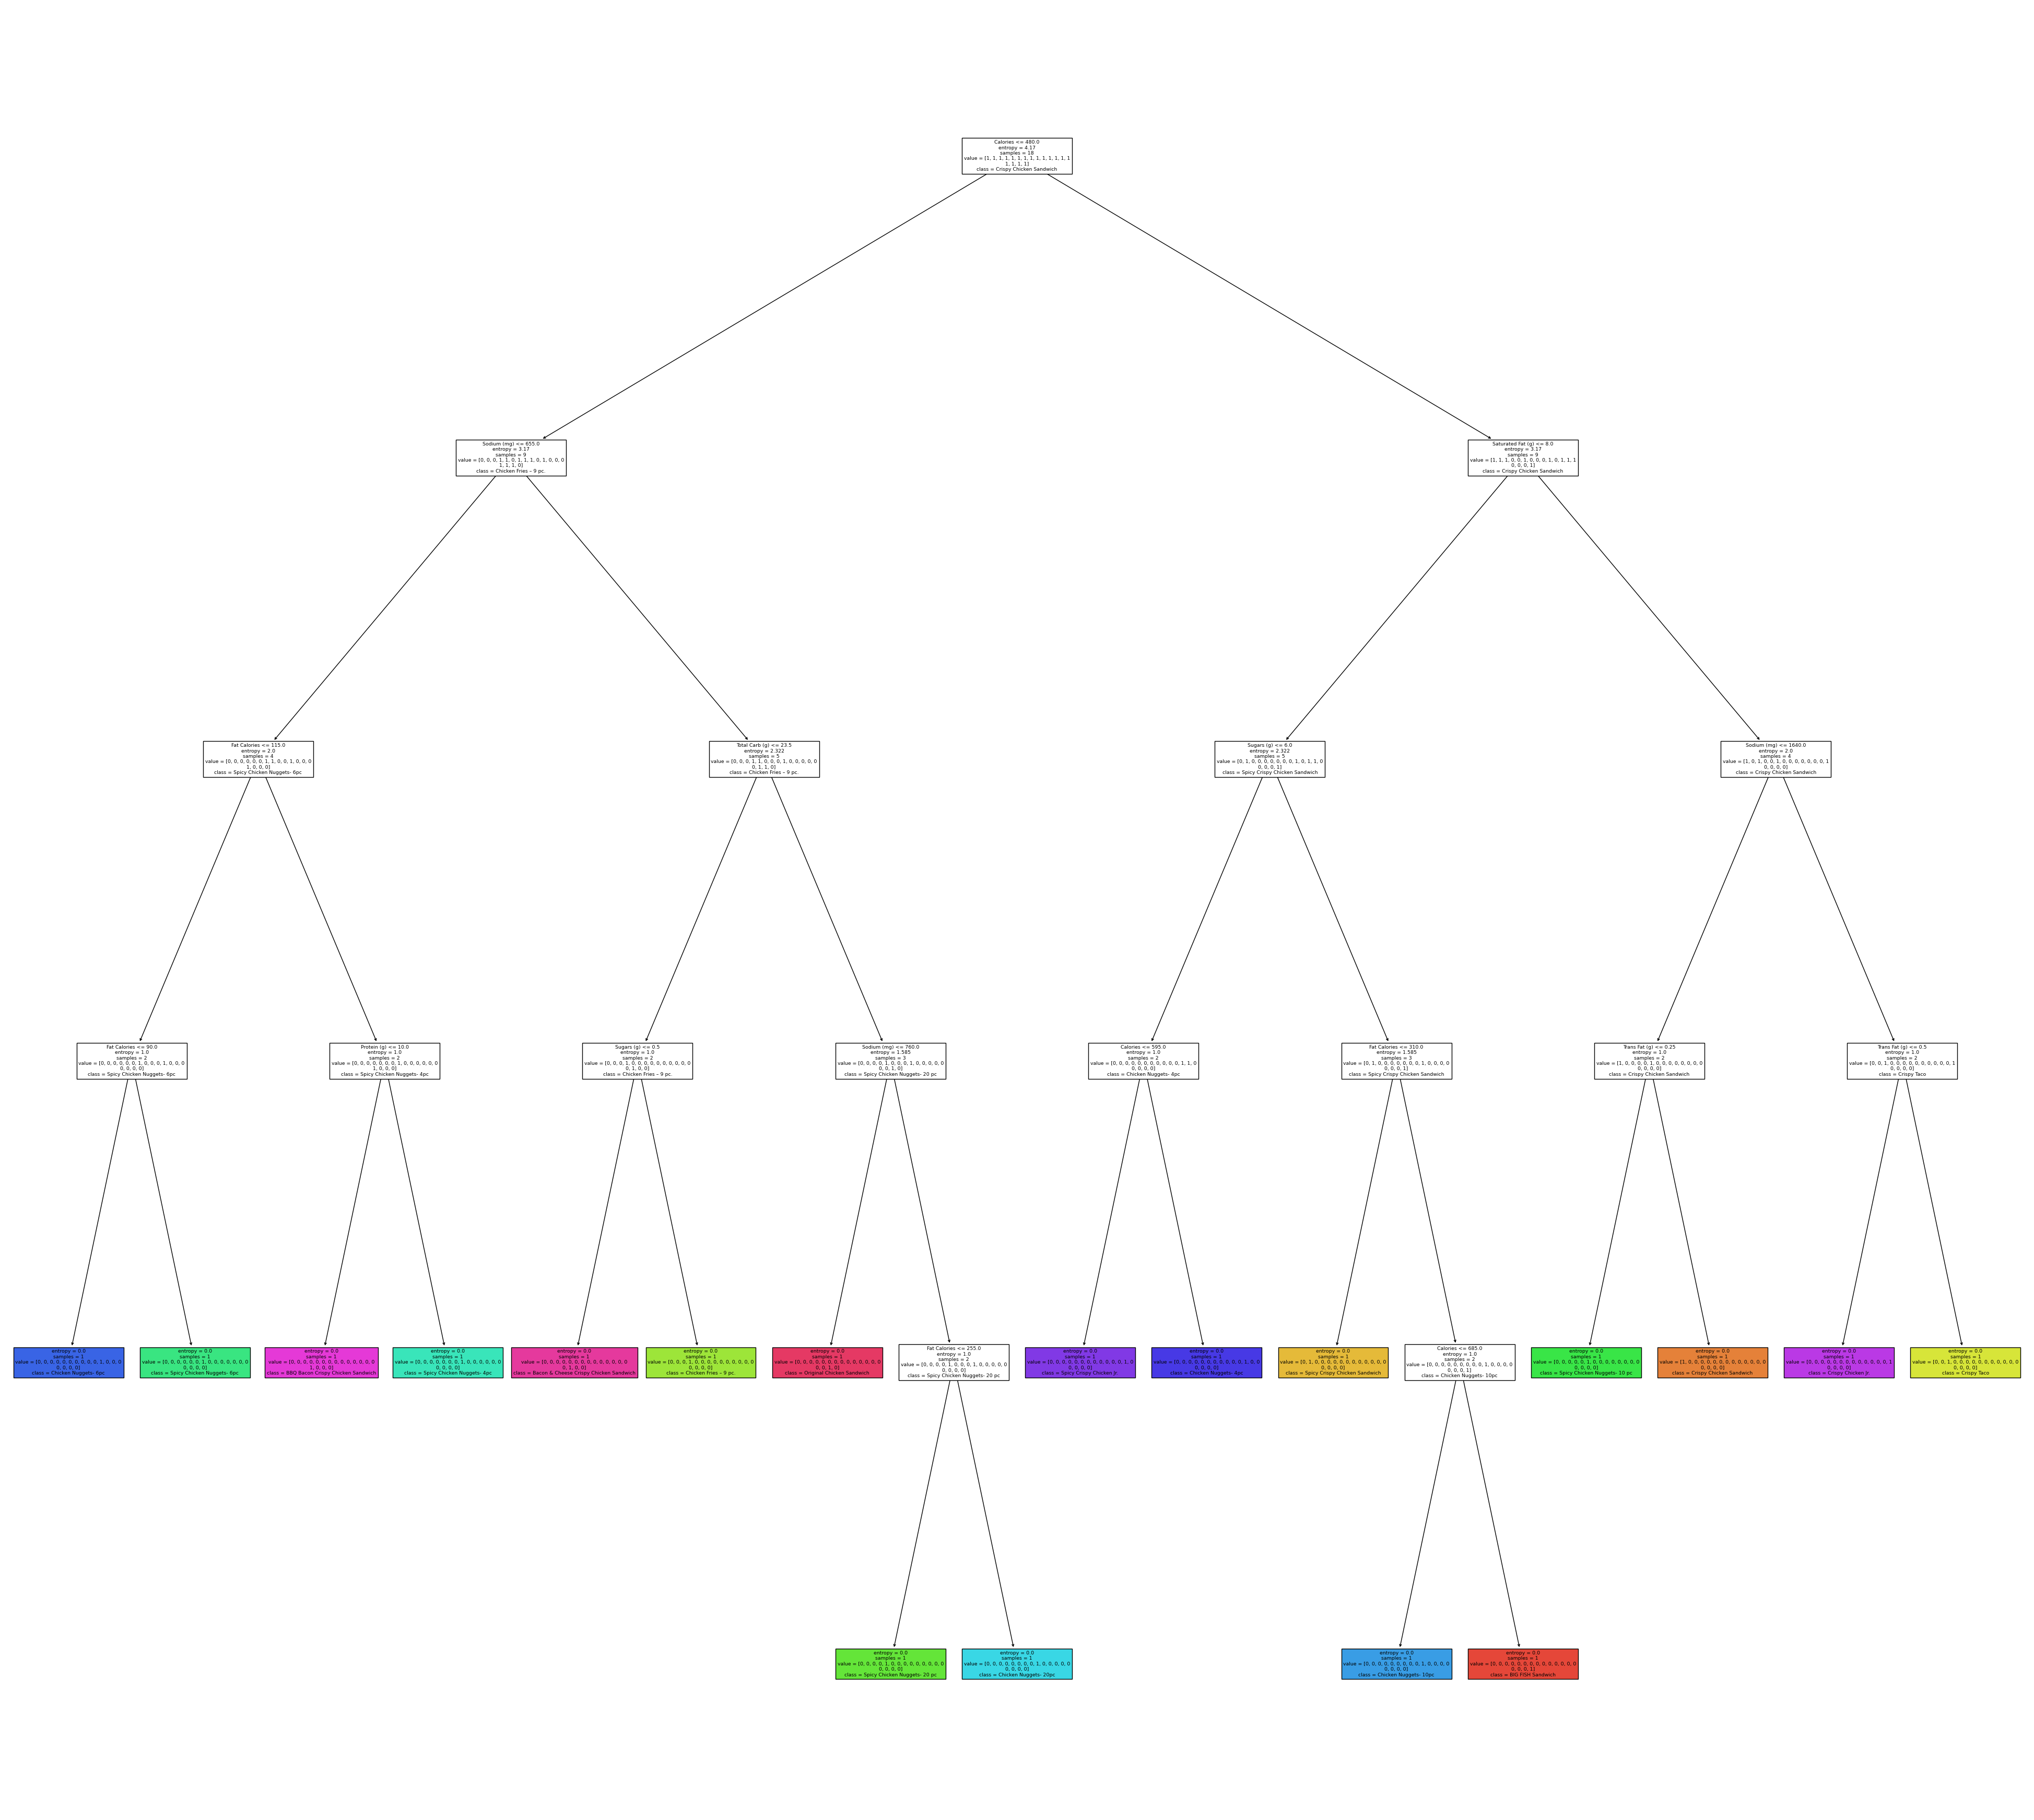

In [46]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2, 
                   feature_names=list(X.columns),  
                   class_names=list(Y.value_counts().index),
                   filled=True)

#### The above decision tree is for chicken items and gives us many insights. There are many items that are similar such as Chicken Nuggets and Spicy Chicken Nuggets, Crispy Chicken Jr and Crispy Taco, Bacon & Cheese Crispy Chicken Sandwich and Chicken Fries and many more. Items such as Crispy Tacos and Chicken Nuggets are very dissimilar. These groupings are mainly influenced by calorie, sodium and fat count in the items.